In [132]:
import pandas as pd
import numpy as np

In [148]:
%%time
#df = pd.read_csv('EBG_.csv', encoding='cp1252')
df = pd.read_excel('EBG.xlsx')
df.head(1)

CPU times: total: 1min 11s
Wall time: 1min 11s


,версия,дата,время,принципал,дата отчётности,код отрасли для ФП,ЧА,ЧП,К1,К2,...,ФЗ_гарантии,Вид гарантии,Бенефициар,РегИспКонт,nul,тип действия,раскрытие,дата раскрытия,долг на 19.10.23,Регион исполнения контракта
0,1.04,2019-10-03,12:33:57,97,2019-07-01,4.0,21563.0,1843,1.1775,0.1936,...,44-ФЗ,Гарантия Исполнения обязательств,МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ ОБЩЕОБРАЗОВАТЕЛЬНОЕ УЧ...,Ставропольский кр,NaN,MEM,False,-,-,г.Георгиевск


In [149]:
len(df)

54863

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54863 entries, 0 to 54862
Data columns (total 73 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   версия                             54863 non-null  float64       
 1   дата                               54863 non-null  datetime64[ns]
 2   время                              54863 non-null  object        
 3   принципал                          54863 non-null  int64         
 4   дата отчётности                    54863 non-null  datetime64[ns]
 5   код отрасли для ФП                 54860 non-null  float64       
 6   ЧА                                 54863 non-null  float64       
 7   ЧП                                 54863 non-null  int64         
 8   К1                                 54634 non-null  float64       
 9   К2                                 54634 non-null  float64       
 10  К3                                

In [160]:
def TF_trasform(row):
    if row==False:
        return 0
    else :
        return 1
df['раскрытие']=df['раскрытие'].apply(TF_trasform)
df.head(2)    

,версия,дата,время,принципал,дата отчётности,код отрасли для ФП,ЧА,ЧП,К1,К2,...,ФЗ_гарантии,Вид гарантии,Бенефициар,РегИспКонт,nul,тип действия,раскрытие,дата раскрытия,долг на 19.10.23,Регион исполнения контракта
0,1.04,2019-10-03,12:33:57,97,2019-07-01,4.0,21563.0,1843,1.1775,0.1936,...,44-ФЗ,Гарантия Исполнения обязательств,МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ ОБЩЕОБРАЗОВАТЕЛЬНОЕ УЧ...,Ставропольский кр,NaN,MEM,0,-,-,г.Георгиевск
1,1.04,2019-10-03,15:23:07,98,2019-07-01,4.0,20793.0,9977,1.0722,0.0557,...,44-ФЗ,Гарантия Исполнения обязательств,"ГОСУДАРСТВЕННОЕ КАЗЕННОЕ УЧРЕЖДЕНИЕ \n""ГЛАВН...",Татарстан,NaN,MEM,0,-,-,г.Казань


Постройте пять графиков по выбранным данным. 
Графики должны быть различных видов и использовать хотя бы две из рассмотренных на занятии библиотек. 
Опишите для каждого графика:
- какого типа переменные участвуют в визуализации;
- какова её цель (например: посмотреть на корреляцию двух величин или на распределение значений);
- почему выбрали именно такой тип графика.

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [139]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 7,5 ## дюймы

### Tепловая карта зависимости коэффициентов и факта дефолта

#### Цель увидеть зависимости факта дефолта с разными показателями

In [174]:
df_=df[(df['тип действия'] == 'PS') & (df['дата']<datetime.strptime('01.05.2023', '%d.%m.%Y'))]
df_corr=df_[['ЧА', 'ЧП', 'К1', 'К2', 'К3', 'К4', 'К5 ', 'К6', 'К7', 'РК', 'РВ', 'Garanti_sum',
                'ФЗ_гарантии', 'Вид гарантии', 'код отрасли для ФП', 'раскрытие']].drop_duplicates(keep='last')
#df_corr.info() #

C:\Users\Vitaliy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


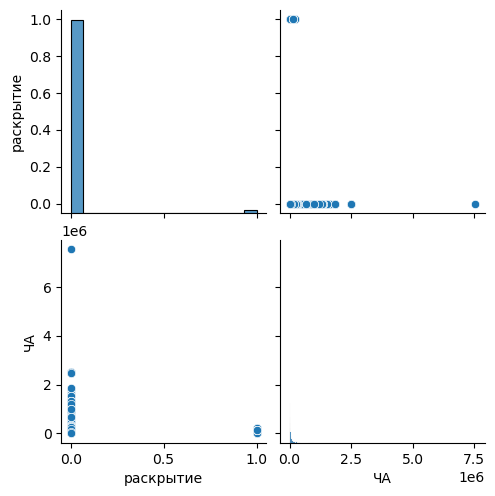

In [175]:
sns.pairplot(df_corr[['раскрытие', 'ЧА']])

C:\Users\Vitaliy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


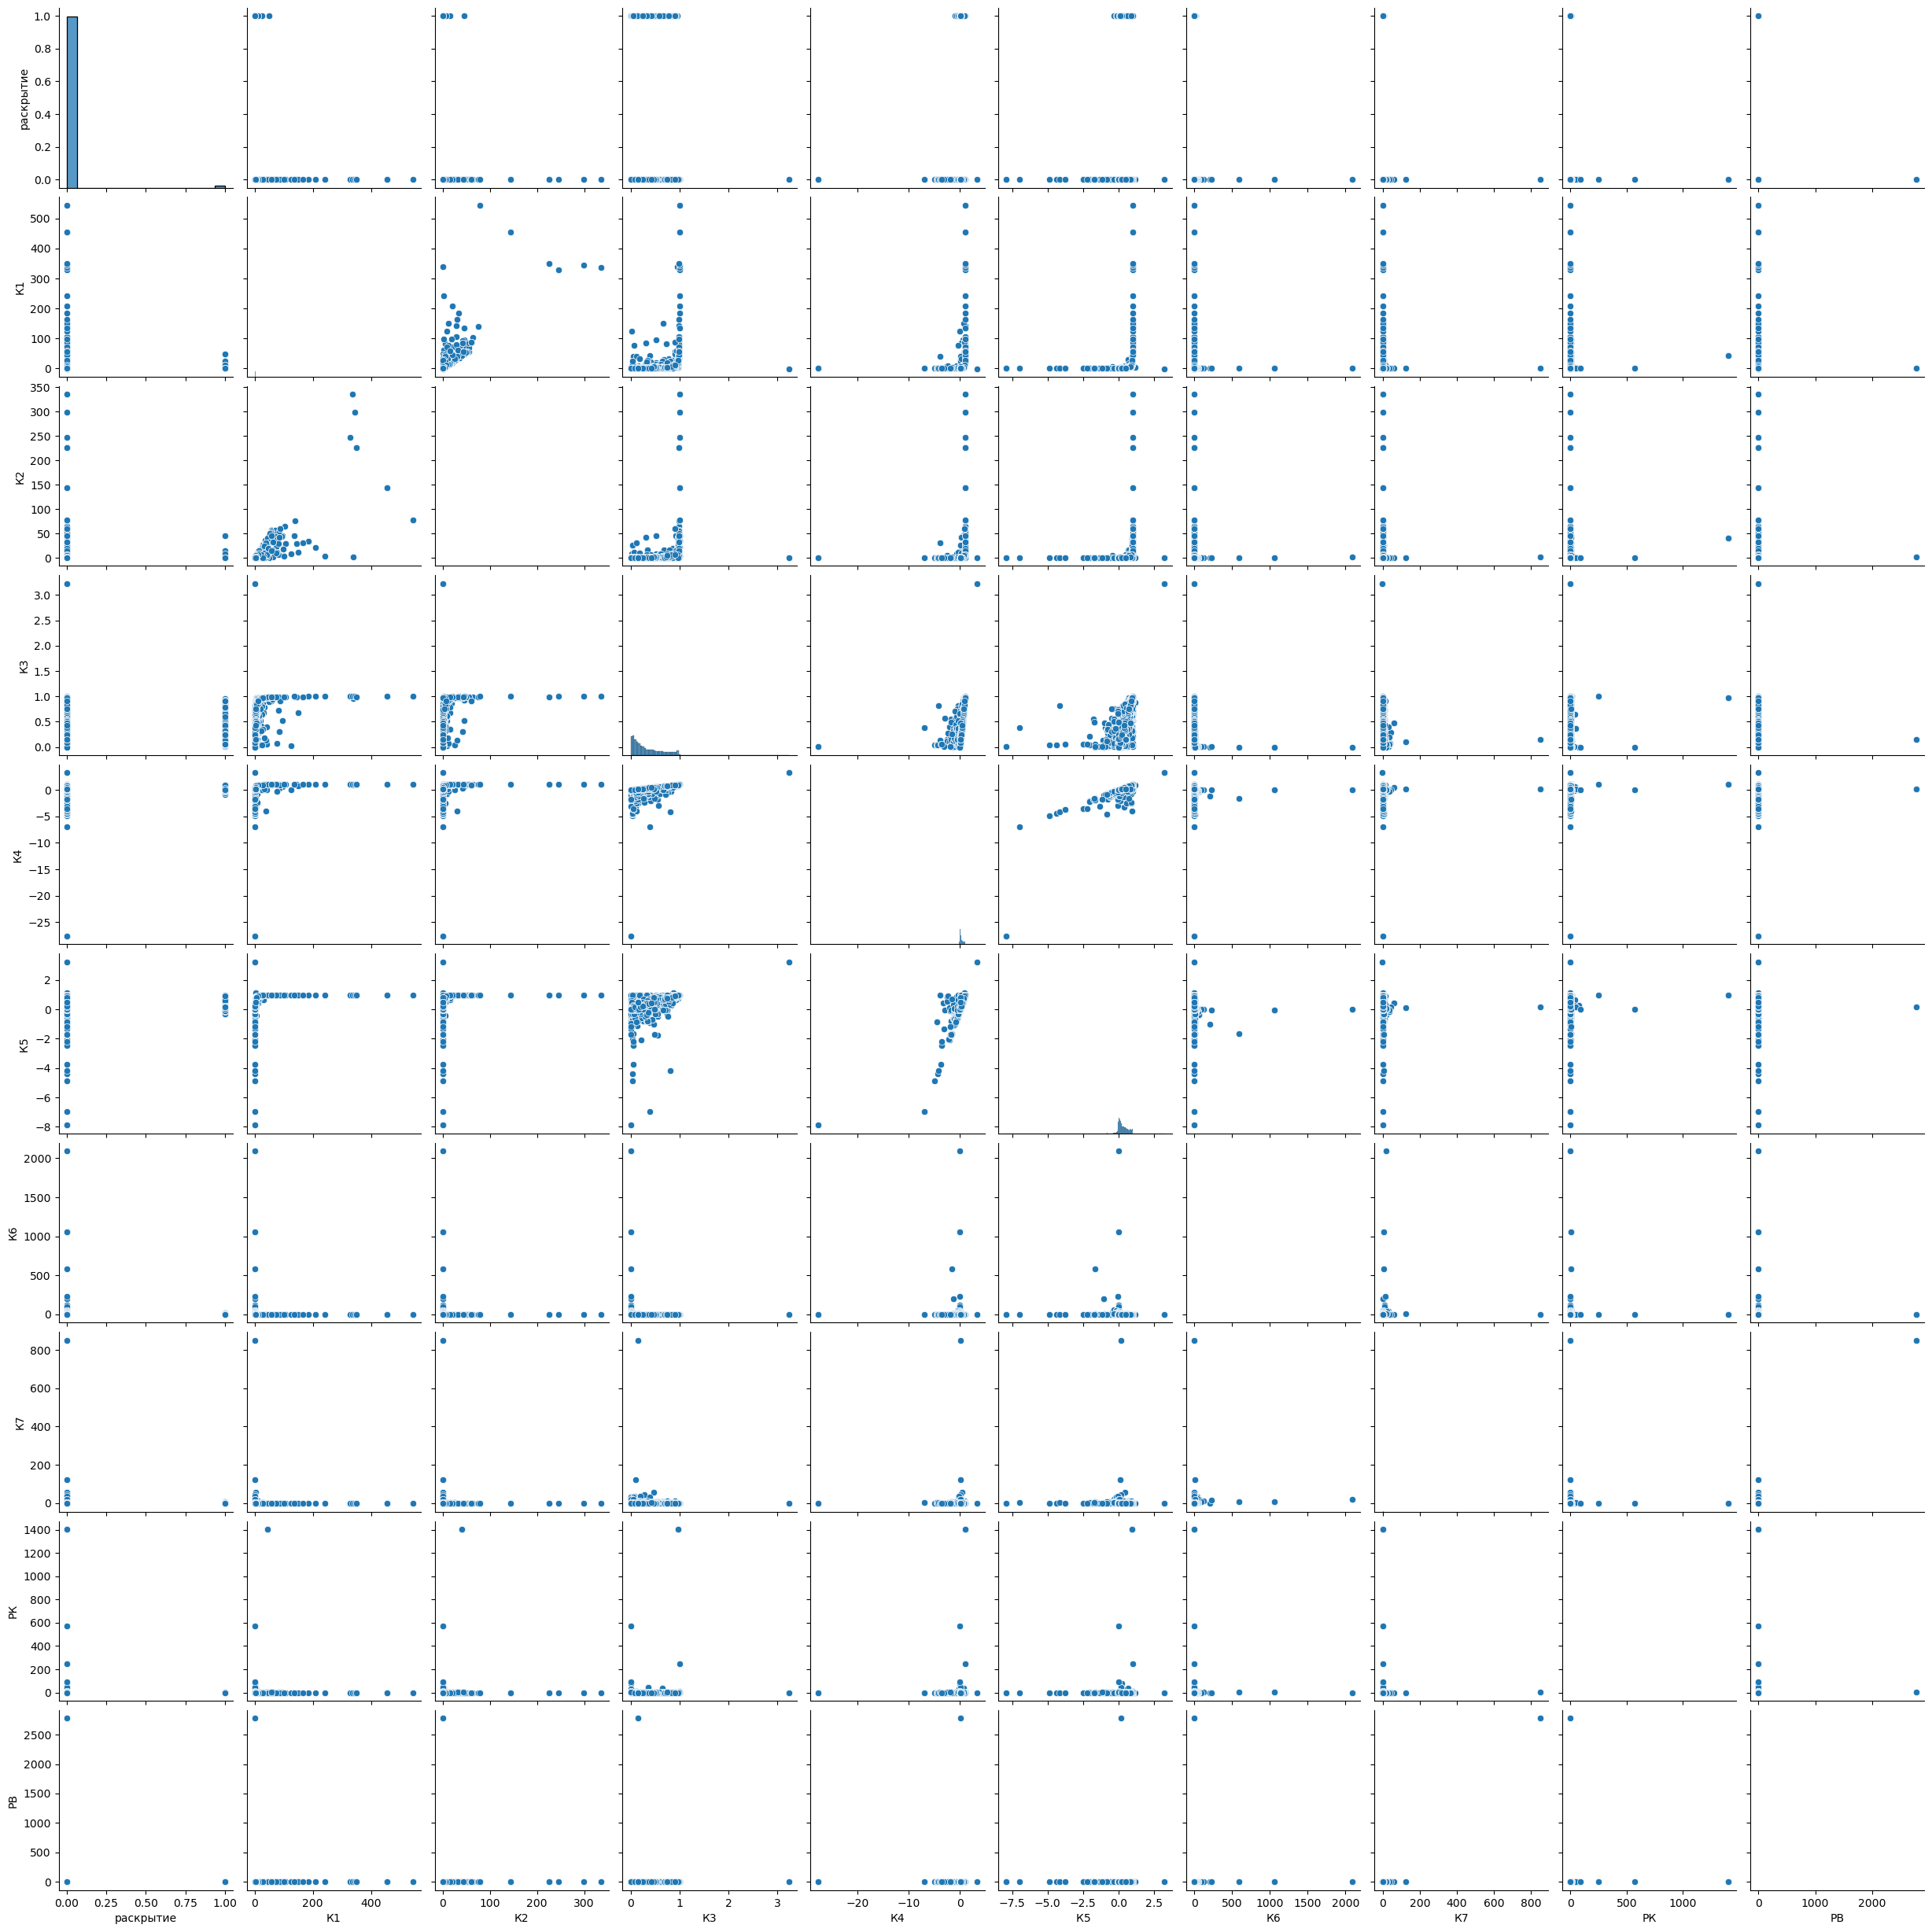

In [180]:
sns.pairplot(df_corr[['раскрытие', 'К1', 'К2', 'К3', 'К4', 'К5 ', 'К6', 'К7', 'РК', 'РВ']])

C:\Users\Vitaliy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


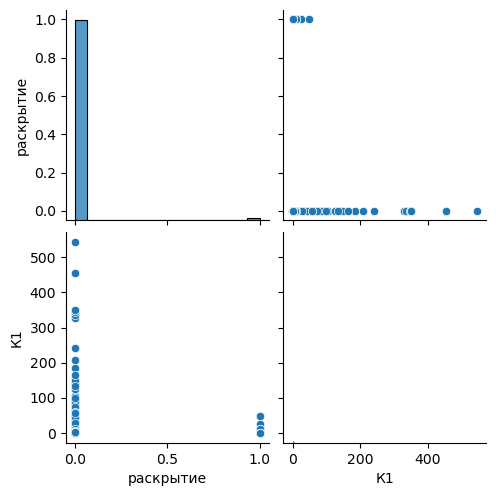

In [245]:
sns.pairplot(df_corr[['раскрытие', 'К1']])
# скорее всегонет зависимости, наблюдаетсяэффект масштаба. Требует доп. анализи.

### Анализ дефолтов на зависимость с другими показателями

In [181]:
df_def=df_corr[df['раскрытие'] == 1]
df_def.head(1)                

C:\Users\Vitaliy\AppData\Local\Temp\ipykernel_7852\1809180068.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_def=df_corr[df['раскрытие'] == 1]


,ЧА,ЧП,К1,К2,К3,К4,К5,К6,К7,РК,РВ,Garanti_sum,ФЗ_гарантии,Вид гарантии,код отрасли для ФП,раскрытие
402,17054.0,1774,25.7653,15.1152,0.9613,0.9612,0.9612,0.0,0.0,0.2081,0.2938,2471153.04,223-ФЗ,Гарантия Исполнения обязательств,4.0,1


Text(0.5, 1.0, 'Дефолты по отраслям')

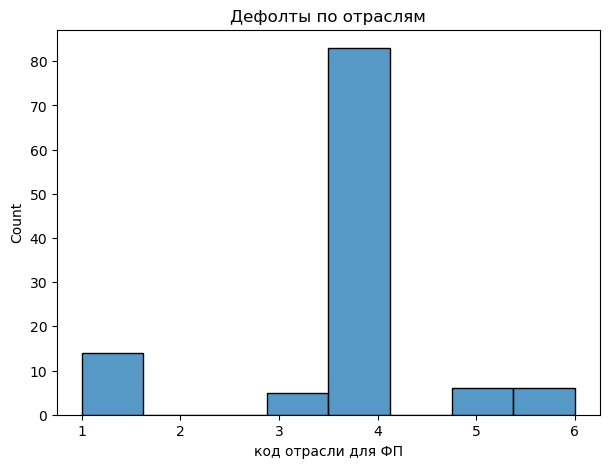

In [182]:
sns.histplot(df_def['код отрасли для ФП'])
plt.title('Дефолты по отраслям') 

Text(0.5, 1.0, 'Выдачи по отраслям')

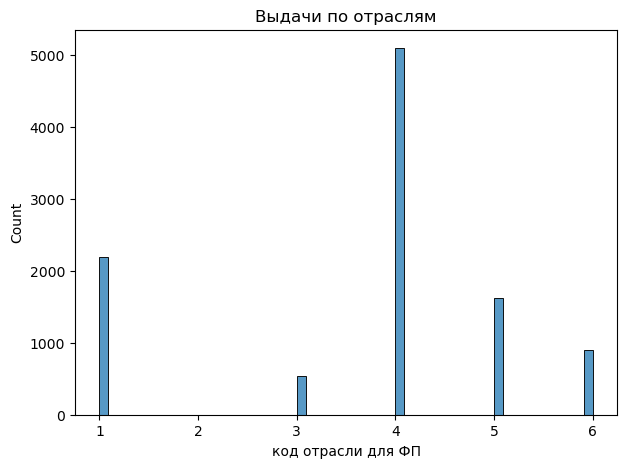

In [247]:
sns.histplot(df_['код отрасли для ФП'])
plt.title('Выдачи по отраслям') 

Text(0.5, 1.0, 'Дефолты по суммам')

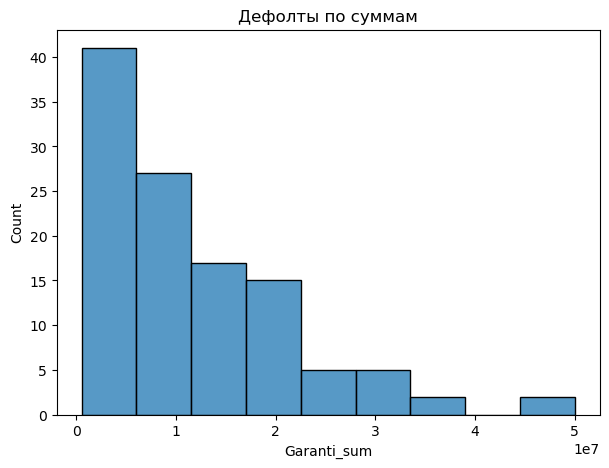

In [183]:
sns.histplot(df_def['Garanti_sum'])
plt.title('Дефолты по суммам') 

Text(0.5, 1.0, 'Дефолты по видам гарантий')

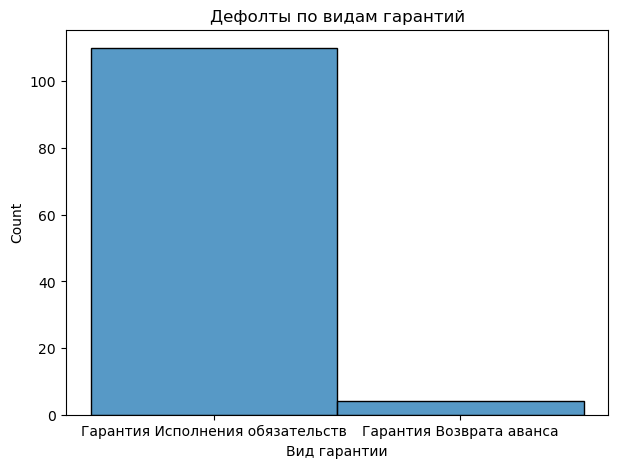

In [184]:
sns.histplot(df_def['Вид гарантии'])
plt.title('Дефолты по видам гарантий') #ФЗ_гарантии

Text(0.5, 1.0, 'Дефолты по видам ФЗ')

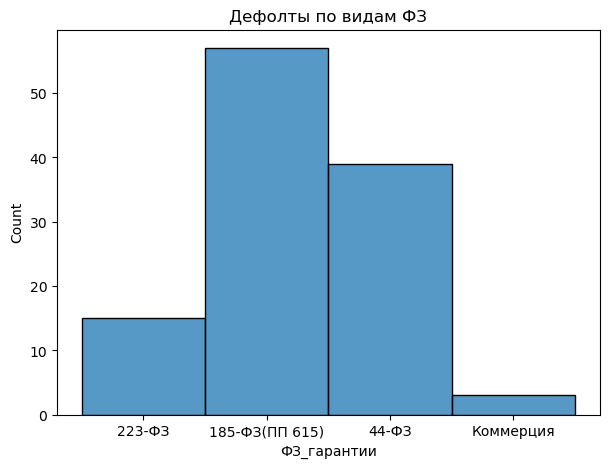

In [185]:
sns.histplot(df_def['ФЗ_гарантии'])
plt.title('Дефолты по видам ФЗ')

In [ ]:
#? посмотрим на взаимосвязь оценок и продаж
df_def.plot(kind='scatter', 
        x='Garanti_sum', 
        y='Global_Sales', 
        title='Корреляция между продажами и оценками пользователей')
plt.ylim(0, 40)

<Axes: >

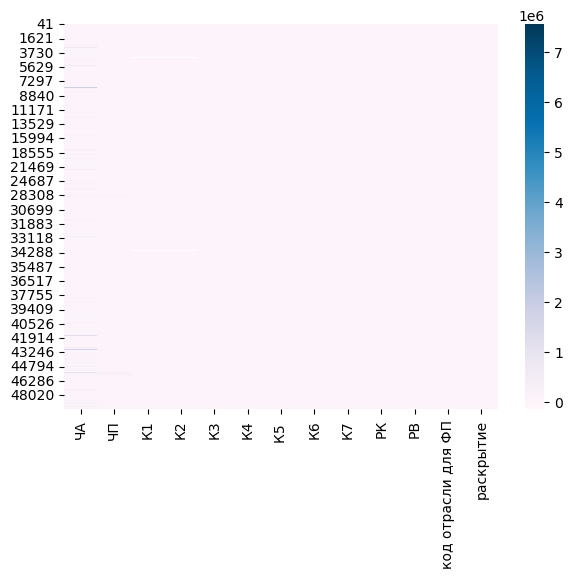

In [162]:
sns.heatmap(df_corr, cmap='PuBu')

## Анализ динамики

In [186]:
df_dinamik=df[['дата', 'принципал','Garanti_sum','соответствие Продукту ЭБГ', 'ФЗ_гарантии',
               'Вид гарантии', 'код отрасли для ФП', 'РегИспКонт', 'тип действия', 'раскрытие']]
#.groupby('соответствие Продукту ЭБГ')
df_dinamik.info()
#len(df_dinamik)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54863 entries, 0 to 54862
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   дата                       54863 non-null  datetime64[ns]
 1   принципал                  54863 non-null  int64         
 2   Garanti_sum                54863 non-null  float64       
 3   соответствие Продукту ЭБГ  54863 non-null  object        
 4   ФЗ_гарантии                54850 non-null  object        
 5   Вид гарантии               54861 non-null  object        
 6   код отрасли для ФП         54860 non-null  float64       
 7   РегИспКонт                 54829 non-null  object        
 8   тип действия               54863 non-null  object        
 9   раскрытие                  54863 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 4.2+ MB


In [211]:
df_dinamik_dubl=df_dinamik.drop_duplicates(keep='last')
df_dinamik_vidachi=df_dinamik_dubl[df_dinamik_dubl['тип действия'] == 'PS']
#df_dinamik_vidachi.info()
df_dinamik_vidachi_summi=df_dinamik_vidachi[['дата','Garanti_sum', 'раскрытие']]
df_dinamik_vidachi_summi.head(1)
#df_dinamik_vidachi['Garanti_sum'].describe()
#[df_dinamik_dubl[''].]


,дата,Garanti_sum,раскрытие
41,2019-10-10,20373264.45,0


Text(0, 0.5, 'Cумма Продажи')

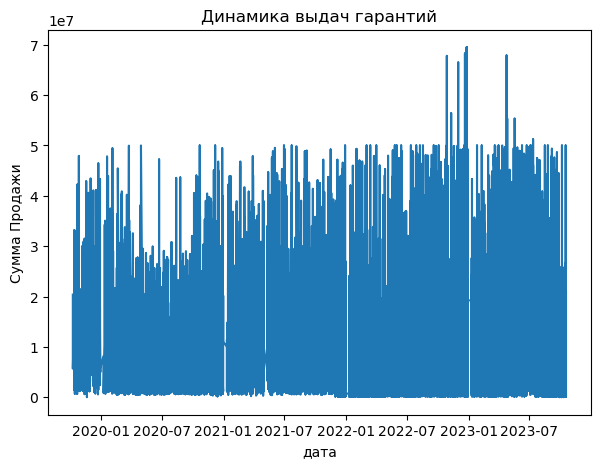

In [188]:
#df_dinamik_vidachi_summi.plot(kind='hist', title='Динамика выдач гарантий',
#                   xlabel='дата',ylabel='СуммаПродажи', grid=True)
plt.plot(df_dinamik_vidachi['дата'], df_dinamik_vidachi['Garanti_sum'])
plt.title('Динамика выдач гарантий')
plt.xlabel('дата')
plt.ylabel('Cумма Продажи')
#plt.show()
# первый позиционный аргумент – точки по Y, второй – точки по X. По умолчанию это единичные отрезки

In [189]:
df_dinamik_vidachi_summi_def=df_dinamik_vidachi_summi[df_dinamik_vidachi_summi['раскрытие'] == 1]
df_dinamik_vidachi_summi_nedef=df_dinamik_vidachi_summi[df_dinamik_vidachi_summi['раскрытие'] == 0]

Text(0, 0.5, 'Выдачи')

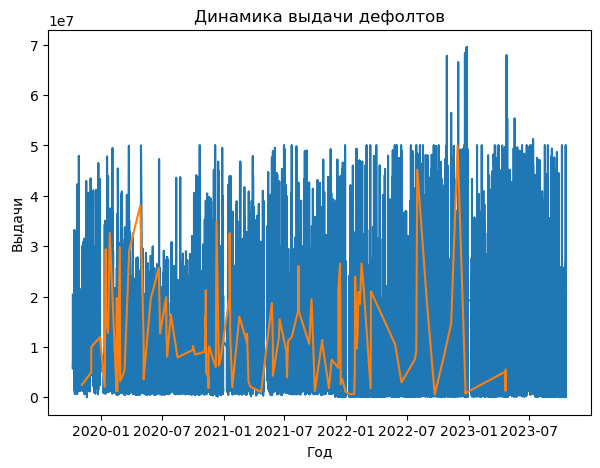

In [194]:
plt.plot(df_dinamik_vidachi_summi_nedef['дата'], df_dinamik_vidachi_summi_nedef['Garanti_sum'])
plt.plot(df_dinamik_vidachi_summi_def['дата'], df_dinamik_vidachi_summi_def['Garanti_sum'])
plt.title('Динамика выдачи дефолтов')
plt.xlabel('Год')
plt.ylabel('Выдачи')
#plt.legend('дефолты','не дефолты')

## Распределение выдач гарантий

<Axes: title={'center': 'Распределение сумм гарантий'}>

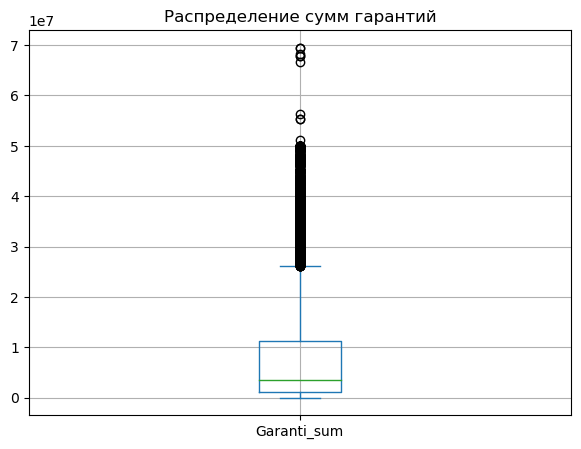

In [195]:
df_dinamik_vidachi_summi['Garanti_sum'].plot(kind='box', 
                   title='Распределение сумм гарантий',grid=True)
#plot(kind='box',title='Распределение оценок пользователей', grid=True)

In [200]:
df_dinamik_vidachi_summi_group=df_dinamik_vidachi_summi.groupby('дата').sum()
df_dinamik_vidachi_summi_group.head(2)

,Garanti_sum,раскрытие
дата,,
2019-10-10,26041138.21,0
2019-10-14,49646341.84,0


<Axes: title={'center': 'Динамика выдач гарантий'}, xlabel='дата', ylabel='Сумма'>

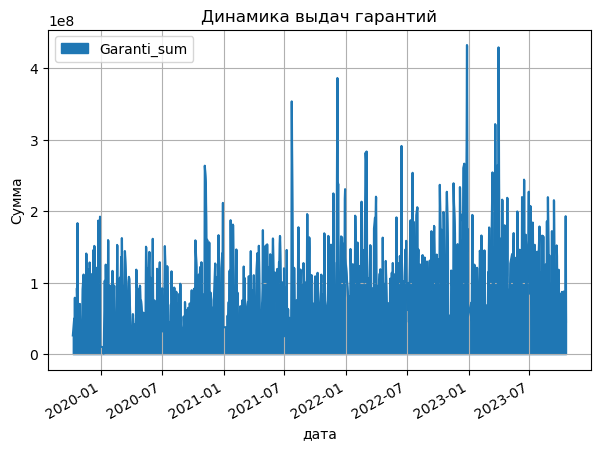

In [201]:
df_dinamik_vidachi_summi_group.drop('раскрытие', axis=1).plot(kind='area',
                              title='Динамика выдач гарантий', xlabel='дата',ylabel='Сумма', grid=True)

In [235]:
df_reg=df_dinamik_vidachi[['РегИспКонт', 'Garanti_sum']]
df_reg_defolt=df_dinamik_vidachi[df_dinamik_vidachi['раскрытие'] == 1][['РегИспКонт', 'Garanti_sum']]
df_reg.head(2)
#df_reg_defolt.head(2)
#df_reg_defolt.info()

,РегИспКонт,Garanti_sum
41,Москва,20373264.45
43,Калужская обл,5667873.76


<Axes: title={'center': 'Распределение Сумм гарантий по регионам'}, ylabel='Garanti_sum'>

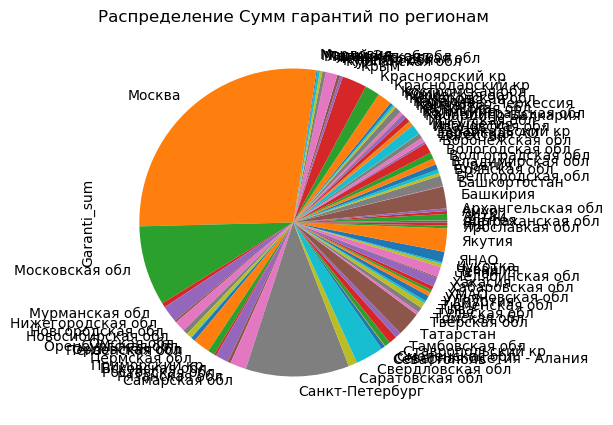

In [241]:
# сумм гарантий по регионам
df_reg_group=df_reg.groupby(['РегИспКонт'])['Garanti_sum'].sum()
df_reg_group.plot(kind='pie', title='Распределение Сумм гарантий по регионам')

<Axes: title={'center': 'Распределение Сумм дефолтных гарантий по регионам'}, ylabel='Garanti_sum'>

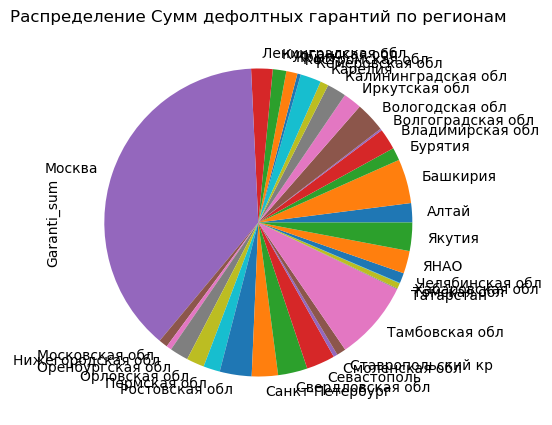

In [238]:
# сумм гарантий по регионам
df_reg_defolt_group=df_reg_defolt.groupby(['РегИспКонт'])['Garanti_sum'].sum()
df_reg_defolt_group.plot(kind='pie', title='Распределение Сумм дефолтных гарантий по регионам')

In [242]:
# ТОП -10 количества гарантий по регионам
df_reg_group_count=df_reg.groupby(['РегИспКонт']).count().sort_values('Garanti_sum', ascending=False).head(10)
df_reg_group_count.style.bar(align='mid')

,Garanti_sum
РегИспКонт,
Москва,2845
Санкт-Петербург,1140
Московская обл,842
Крым,312
Башкирия,264
Свердловская обл,264
Татарстан,253
Краснодарский кр,235
Ростовская обл,218


In [244]:
# ТОП -10 количества дефолтных гарантий по регионам
df_reg_defolt_group_count=df_reg_defolt.groupby(['РегИспКонт']).count().sort_values('Garanti_sum', ascending=False).head(10)
df_reg_defolt_group_count.style.bar(align='mid')


,Garanti_sum
РегИспКонт,
Москва,54
Тамбовская обл,6
Санкт-Петербург,5
Смоленская обл,4
Свердловская обл,4
Оренбургская обл,3
Алтай,2
Челябинская обл,2
Ставропольский кр,2
